# Import Modules

## Notebook Settings

In [1]:
%%capture
%load_ext autoreload
%autoreload 2

## Python Packages

In [2]:
import sys
import os
print("os.getcwd():", "\n", os.getcwd())

sys.path.insert(
    0,
    os.path.join(
        os.environ["PROJ_irox"],
        "data"))
from proj_data_irox import proj_dir_name, irox_bulk_color_map

# #############################################################################
import pickle

import chart_studio.plotly as py
import plotly.graph_objs as go

import plotly.offline as py_off
from plotly.offline import (
    init_notebook_mode,
    iplot,
    )

# #############################################################################
from methods import (
    create_pourbaix_plot,
    create_outside_borders,
    create_pourb_entry_outline,
    create_oer_equil_line,
    )

init_notebook_mode(connected=True)

os.getcwd(): 
 /home/raulf2012/Dropbox/01_norskov/00_git_repos/PROJ_IrOx_Active_Learning_OER/workflow/07_bulk_pourbaix/01_pourbaix_scripts


# Script Inputs

In [3]:
run_create_entries_script = True

axis_ranges = {
    "x_axis": [0., 14],
    "y_axis": [0., 2.5],
    }

save_plot = True

entries_to_remove_list = [
#     "IrO3_rutile-like",
#     "IrO3_battery",
#     "IrO3_a-AlF3",
    ]

# Load Entry Data

In [4]:
%%capture
if run_create_entries_script:
    print("ISDIFJSDIFIDsj")
    !python sc_create_all_entries.py


# #############################################################################
path_i = os.path.join(
    "out_data",
    "all_entries.pickle")
with open(path_i, "rb") as fle:
    all_entries = pickle.load(fle)
# #############################################################################

# Process Data for Plotting

In [5]:
directory = "00_figures"
if not os.path.exists(directory):
    os.makedirs(directory)

data_entry_borders = create_pourb_entry_outline(
    entries_to_remove_list=entries_to_remove_list,
    all_entries=all_entries)

outside_border = create_outside_borders(axis_ranges=axis_ranges)

data, layout = create_pourbaix_plot(entries=all_entries, axis_ranges=axis_ranges)

oer_equil_line = create_oer_equil_line(axis_ranges=axis_ranges)

data += data_entry_borders
data += [outside_border]
data += [oer_equil_line]

# Plotting

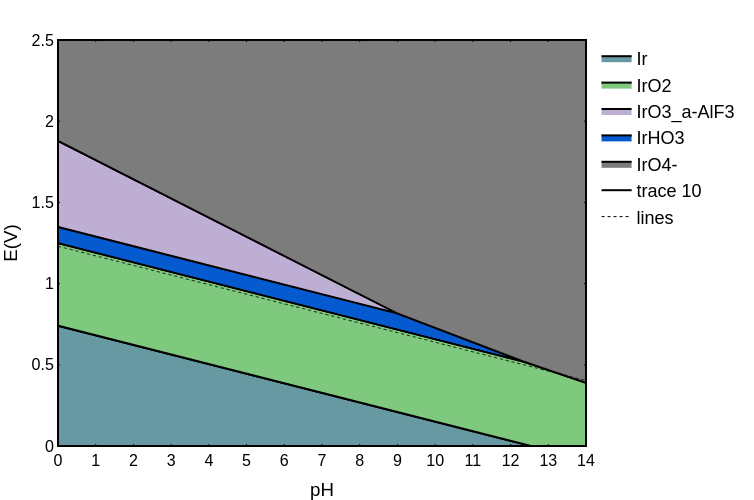

In [6]:
layout["xaxis"]["dtick"] = 1
layout["yaxis"]["dtick"] = 0.5

layout["width"] = 600
layout["height"] = 500
layout["yaxis"]["dtick"] = None

layout_override = go.Layout(
    showlegend=True,
    font=go.layout.Font(
        color="black",
        family=None,
        size=18,
        ),
    annotations=None,
    )

layout.update(layout_override)

fig = go.Figure(data=data, layout=layout)
fig.show()

In [7]:
# Pickling data ######################################################
directory = "out_data"
if not os.path.exists(directory): os.makedirs(directory)
with open(os.path.join(directory, "pourb_fig_0.pickle"), "wb") as fle:
    pickle.dump(fig, fle)
# #####################################################################